In [1]:
# Name: Meghan OConnell
# Date: 6/16/2023
# Due Date: 6/18/2023
# Course: CS379-2303A-01 Machine Learning

In [2]:
# Description:
#   This is a supervised algorithm that predicts 
#   whether a passenger will survive on the titanic 
#   using a Decision Tree Classifier algorithm

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the data set
#I used Pandas for this since the code used in the
    #video was referencing a sample
exfile = pd.read_excel(r"C:\Users\letha\Local Documents\Jupyter\CS379\Unit1\titanic_THIS.xls")

#Print the first 10 rows of the data
exfile.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [5]:
#Count the num of rows and columns in the data set
exfile.shape

(1309, 14)

In [6]:
#Getting statistics using a pandas method
exfile.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
#Counting the survivors column
exfile['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

C:\Users\letha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

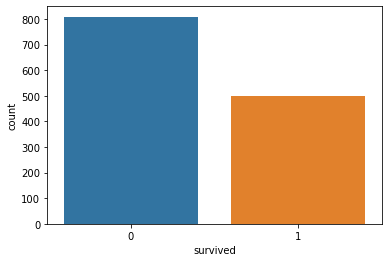

In [8]:
#Visualize the count of number of survivors
sns.countplot(exfile['survived'],label="Count")

In [9]:
#Survival rate by sex
exfile.groupby('sex')['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

In [10]:
#Survival rate by sex, age and class
age = pd.cut(exfile['age'], [0, 18, 80])
exfile.pivot_table('survived', ['sex', age], 'pclass')

pclass                  1         2         3
sex    age                                   
female (0, 18]   0.923077  0.952381  0.534483
       (18, 80]  0.966667  0.878049  0.436170
male   (0, 18]   0.750000  0.523810  0.208333
       (18, 80]  0.328671  0.087591  0.158845

<AxesSubplot:xlabel='sex'>

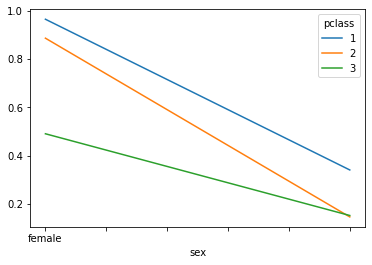

In [11]:
#Survival rate by sex and class visually
exfile.pivot_table('survived', index='sex', 
                    columns='pclass').plot()

<AxesSubplot:xlabel='pclass', ylabel='survived'>

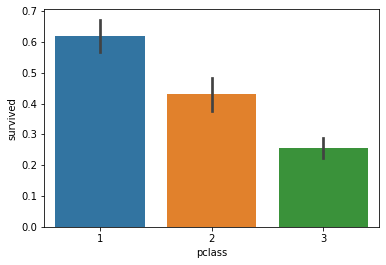

In [12]:
#Survival rate of each class
sns.barplot(x='pclass', y='survived', data=exfile)

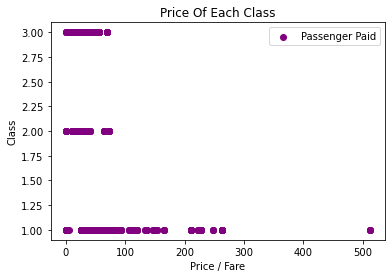

In [13]:
#Ticket prices per class
plt.scatter(exfile['fare'], exfile['pclass'],  
        color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [14]:
#Counting columns with missing values
#A numpy method was used
exfile.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [15]:
#Counting num of rows and columns prior to cleaning
exfile.shape

(1309, 14)

In [16]:
#Remove rows with missing values
exfile = exfile.dropna(subset = ['embarked', 'age'])

In [17]:
#Drop columns with missing data
exfile = exfile.drop(['boat', 'body', 'cabin', 
                    'embarked', 'home.dest',


In [18]:
#Count the new num of rows and columns in exfile
exfile.shape

(1044, 7)

In [19]:
#Looking at data types
exfile.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
dtype: object

In [20]:
#Printing unique values in columns
print(exfile['sex'].unique())

['female' 'male']


In [21]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

#Encoding the sex colum with numeric values
exfile.iloc[:, 2] = labelEncoder.fit_transform(exfile.iloc[:, 2].values)

In [22]:
#Printing unique values in columns after type change
print(exfile['sex'].unique())

[0 1]


In [23]:
exfile.dtypes

pclass        int64
survived      int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
dtype: object

In [24]:
# Split the data into independent x and dependent
    # y variables
x = exfile.iloc[:, 1:7].values
y = exfile.iloc[:, 0].values

In [25]:
# Split the data into 80% training, 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                test_size=0.2, random_state=0)

In [26]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [28]:
# I chose to use the DecisionTreeClassifier

def models(x_train, y_train):

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(x_train, y_train)

## References

Elam, D. (2023, June 13). Unit 1 Live Chat: Introduction [chat]. Retrieved from Colorado Technical University, Virtual Campus, APA Style Lab: https://campus.ctuonline.edu

Tracyrenee. (2021, July 22). Using KMeans clustering to predict survivors of the Titanic. Medium; MLearning.ai. https://medium.com/mlearning-ai/using-kmeans-clustering-to-predict-survivors-of-the-titanic-ae3d3e959eb8
‌
Randerson112358. (2019, July 22). Titanic Survival Prediction Using Machine Learning - Better Programming. Medium; Better Programming. https://betterprogramming.pub/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16

Reading an excel file using Python. (2018, April 23). GeeksforGeeks; GeeksforGeeks. https://www.geeksforgeeks.org/reading-excel-file-using-python/![image.png](attachment:image.png)